<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/camila_fnirs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento Toque Mãe-Estranha

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Gattering

Os dados já estão em termos de concentrações de HBO, HBD e HBT.

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/HB.xlsx")
df.ss = df.ss.replace([1,2],["Mãe","Estranha"])
df.HB = df.HB.replace([1,2,3],["HBO","HBD","HBT"])
df.head()

,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,2,0.0,0,0,HBO,0.062680,1.406241,-5.799927,4.090419,-0.452860,...,0.099710,0.354049,-0.600325,-0.521948,-0.022384,-0.071927,0.215774,-0.000747,-0.535485,-3.736730
1,2,0.1,0,0,HBO,0.065133,1.408477,-6.282114,3.495037,-0.522570,...,-0.004503,0.297729,-0.650926,-0.579888,-0.027996,-0.063694,0.213336,-0.004526,-0.531858,-3.651143
2,2,0.2,0,0,HBO,0.066704,1.413734,-6.739629,2.932392,-0.590977,...,-0.107778,0.241564,-0.700406,-0.635761,-0.032801,-0.054136,0.211747,-0.008711,-0.528265,-3.576792
3,2,0.3,0,0,HBO,0.065731,1.422090,-7.166934,2.411120,-0.658817,...,-0.208989,0.186312,-0.748189,-0.688536,-0.036721,-0.043049,0.211460,-0.013996,-0.525008,-3.517502
4,2,0.4,0,0,HBO,0.060981,1.433477,-7.558980,1.939017,-0.726299,...,-0.307532,0.132359,-0.794238,-0.737735,-0.039876,-0.030387,0.212787,-0.020902,-0.522332,-3.476248


In [4]:
df_HB_stim = df[ (df.HB == "HBO") & ((df.ss == "Mãe") | (df.ss == "Estranha")) ][['ss'] + list(df.columns[5::])]
df_HB_stim.head()

,ss,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,S2_D4 6,S2_D5 7,S2_D7 8,S3_D5 9,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
486,Mãe,-0.132406,-3.908855,-35.500218,-10.262647,-0.935947,0.372766,0.217738,1.199009,-0.693869,...,-0.284169,0.694616,-0.430138,0.699085,-1.156776,-0.347321,-1.161700,-0.511452,0.031038,1.625146
487,Mãe,-0.135544,-3.986723,-34.871579,-10.477651,-0.969660,0.492591,0.242948,1.231623,-0.640493,...,-0.276230,0.738153,-0.422357,0.724065,-1.154172,-0.346587,-1.130797,-0.481348,0.055745,1.487441
488,Mãe,-0.130255,-4.085677,-34.140711,-10.620425,-1.000023,0.616064,0.266182,1.266925,-0.583112,...,-0.267220,0.789669,-0.415961,0.747067,-1.150132,-0.347957,-1.096220,-0.445586,0.083441,1.314463
489,Mãe,-0.116441,-4.201252,-33.338839,-10.662684,-1.026218,0.740817,0.287124,1.303330,-0.523505,...,-0.258116,0.847091,-0.412290,0.767352,-1.145607,-0.350979,-1.059324,-0.405867,0.112899,1.115578
490,Mãe,-0.093767,-4.326780,-32.504952,-10.584030,-1.046946,0.863361,0.305346,1.339089,-0.463616,...,-0.250087,0.907551,-0.412748,0.784167,-1.141495,-0.355074,-1.021801,-0.364167,0.142548,0.902655


# Data Exploration

Alguns gráficos obtidos pelos valores médios sobre todos os sujeitos.

In [5]:
df_melted = df_HB_stim.melt(id_vars='ss', var_name='Variavel', value_name='Valor', value_vars=df_HB_stim.columns[1::])
df_melted.head()

,ss,Variavel,Valor
0,Mãe,S1_D1 1,-0.132406
1,Mãe,S1_D1 1,-0.135544
2,Mãe,S1_D1 1,-0.130255
3,Mãe,S1_D1 1,-0.116441
4,Mãe,S1_D1 1,-0.093767


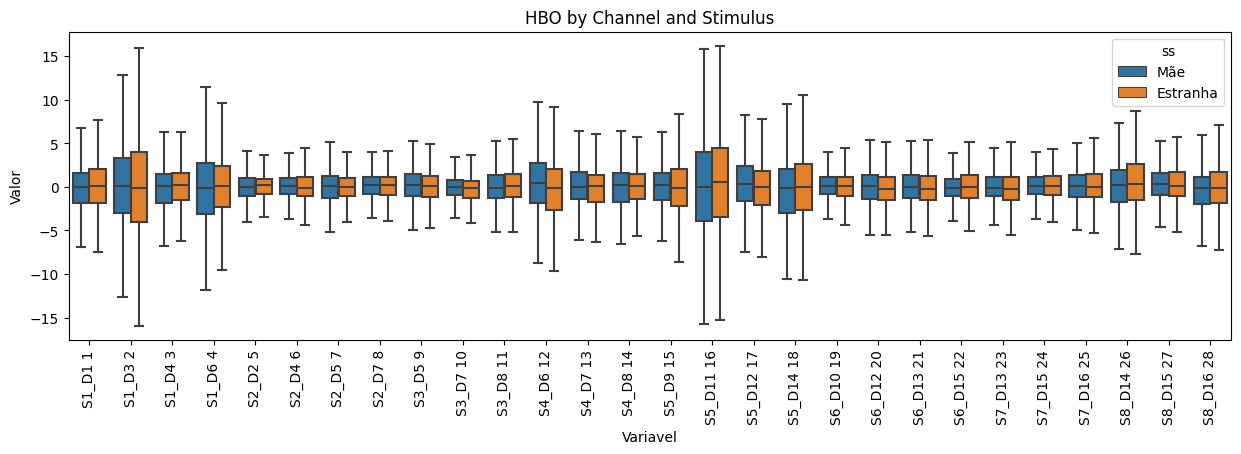

In [6]:
plt.figure(figsize=(15,4))

sns.boxplot(data=df_melted, x='Variavel', y='Valor', hue='ss', showfliers=False)
plt.title('HBO by Channel and Stimulus')
plt.xticks(rotation=90)
plt.show()

In [7]:
df_SD = df[ (df.HB == 'HBT') & (df.ss != 0) ][['subj','obj.t', 'obj.s', 'ss', 'HB', 'S4_D6 12']]
df_SD['t'] = 0
df_SD = df_SD.reset_index(drop=True)
df_SD.head()

,subj,obj.t,obj.s,ss,HB,S4_D6 12,t
0,2,48.599998,0,Mãe,HBT,2.558367,0
1,2,48.700001,0,Mãe,HBT,2.613189,0
2,2,48.799999,0,Mãe,HBT,2.683178,0
3,2,48.900002,0,Mãe,HBT,2.769135,0
4,2,49.000000,0,Mãe,HBT,2.872650,0


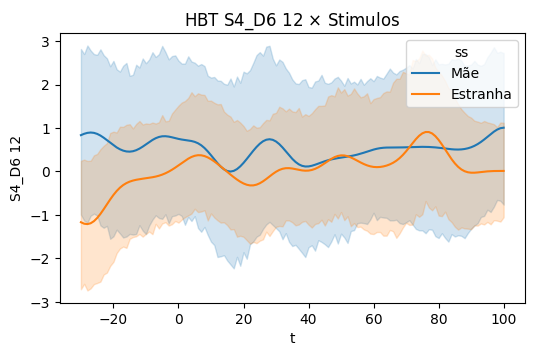

In [8]:
plt.figure(figsize=(6,3.5))

for i in range(len(df_SD)):
  if df_SD.iloc[i]['obj.s'] == 1:
    for j in range(-30,101):
      df_SD.at[i+j,'t'] = j

sns.lineplot(x='t',y=df_SD.columns[-2],hue='ss',data=df_SD)
plt.title('HBT ' + df_SD.columns[-2] + ' $\\times$ Stimulos')

plt.show()

In [9]:
df.head()

,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,2,0.0,0,0,HBO,0.062680,1.406241,-5.799927,4.090419,-0.452860,...,0.099710,0.354049,-0.600325,-0.521948,-0.022384,-0.071927,0.215774,-0.000747,-0.535485,-3.736730
1,2,0.1,0,0,HBO,0.065133,1.408477,-6.282114,3.495037,-0.522570,...,-0.004503,0.297729,-0.650926,-0.579888,-0.027996,-0.063694,0.213336,-0.004526,-0.531858,-3.651143
2,2,0.2,0,0,HBO,0.066704,1.413734,-6.739629,2.932392,-0.590977,...,-0.107778,0.241564,-0.700406,-0.635761,-0.032801,-0.054136,0.211747,-0.008711,-0.528265,-3.576792
3,2,0.3,0,0,HBO,0.065731,1.422090,-7.166934,2.411120,-0.658817,...,-0.208989,0.186312,-0.748189,-0.688536,-0.036721,-0.043049,0.211460,-0.013996,-0.525008,-3.517502
4,2,0.4,0,0,HBO,0.060981,1.433477,-7.558980,1.939017,-0.726299,...,-0.307532,0.132359,-0.794238,-0.737735,-0.039876,-0.030387,0.212787,-0.020902,-0.522332,-3.476248


In [10]:
for i in range(len(df)):
  if df.iloc[i]['obj.s'] == 1:
    for j in range(-30,101):
      df.at[i+j,'t'] = j



In [11]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Mãe') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

df_HBO_HBD.head()

,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28,t
0,2,48.599998,0,Mãe,HBO,-0.132406,-3.908855,-35.500218,-10.262647,-0.935947,...,0.694616,-0.430138,0.699085,-1.156776,-0.347321,-1.161700,-0.511452,0.031038,1.625146,-30.0
1,2,48.700001,0,Mãe,HBO,-0.135544,-3.986723,-34.871579,-10.477651,-0.969660,...,0.738153,-0.422357,0.724065,-1.154172,-0.346587,-1.130797,-0.481348,0.055745,1.487441,-29.0
2,2,48.799999,0,Mãe,HBO,-0.130255,-4.085677,-34.140711,-10.620425,-1.000023,...,0.789669,-0.415961,0.747067,-1.150132,-0.347957,-1.096220,-0.445586,0.083441,1.314463,-28.0
3,2,48.900002,0,Mãe,HBO,-0.116441,-4.201252,-33.338839,-10.662684,-1.026218,...,0.847091,-0.412290,0.767352,-1.145607,-0.350979,-1.059324,-0.405867,0.112899,1.115578,-27.0
4,2,49.000000,0,Mãe,HBO,-0.093767,-4.326780,-32.504952,-10.584030,-1.046946,...,0.907551,-0.412748,0.784167,-1.141495,-0.355074,-1.021801,-0.364167,0.142548,0.902655,-26.0


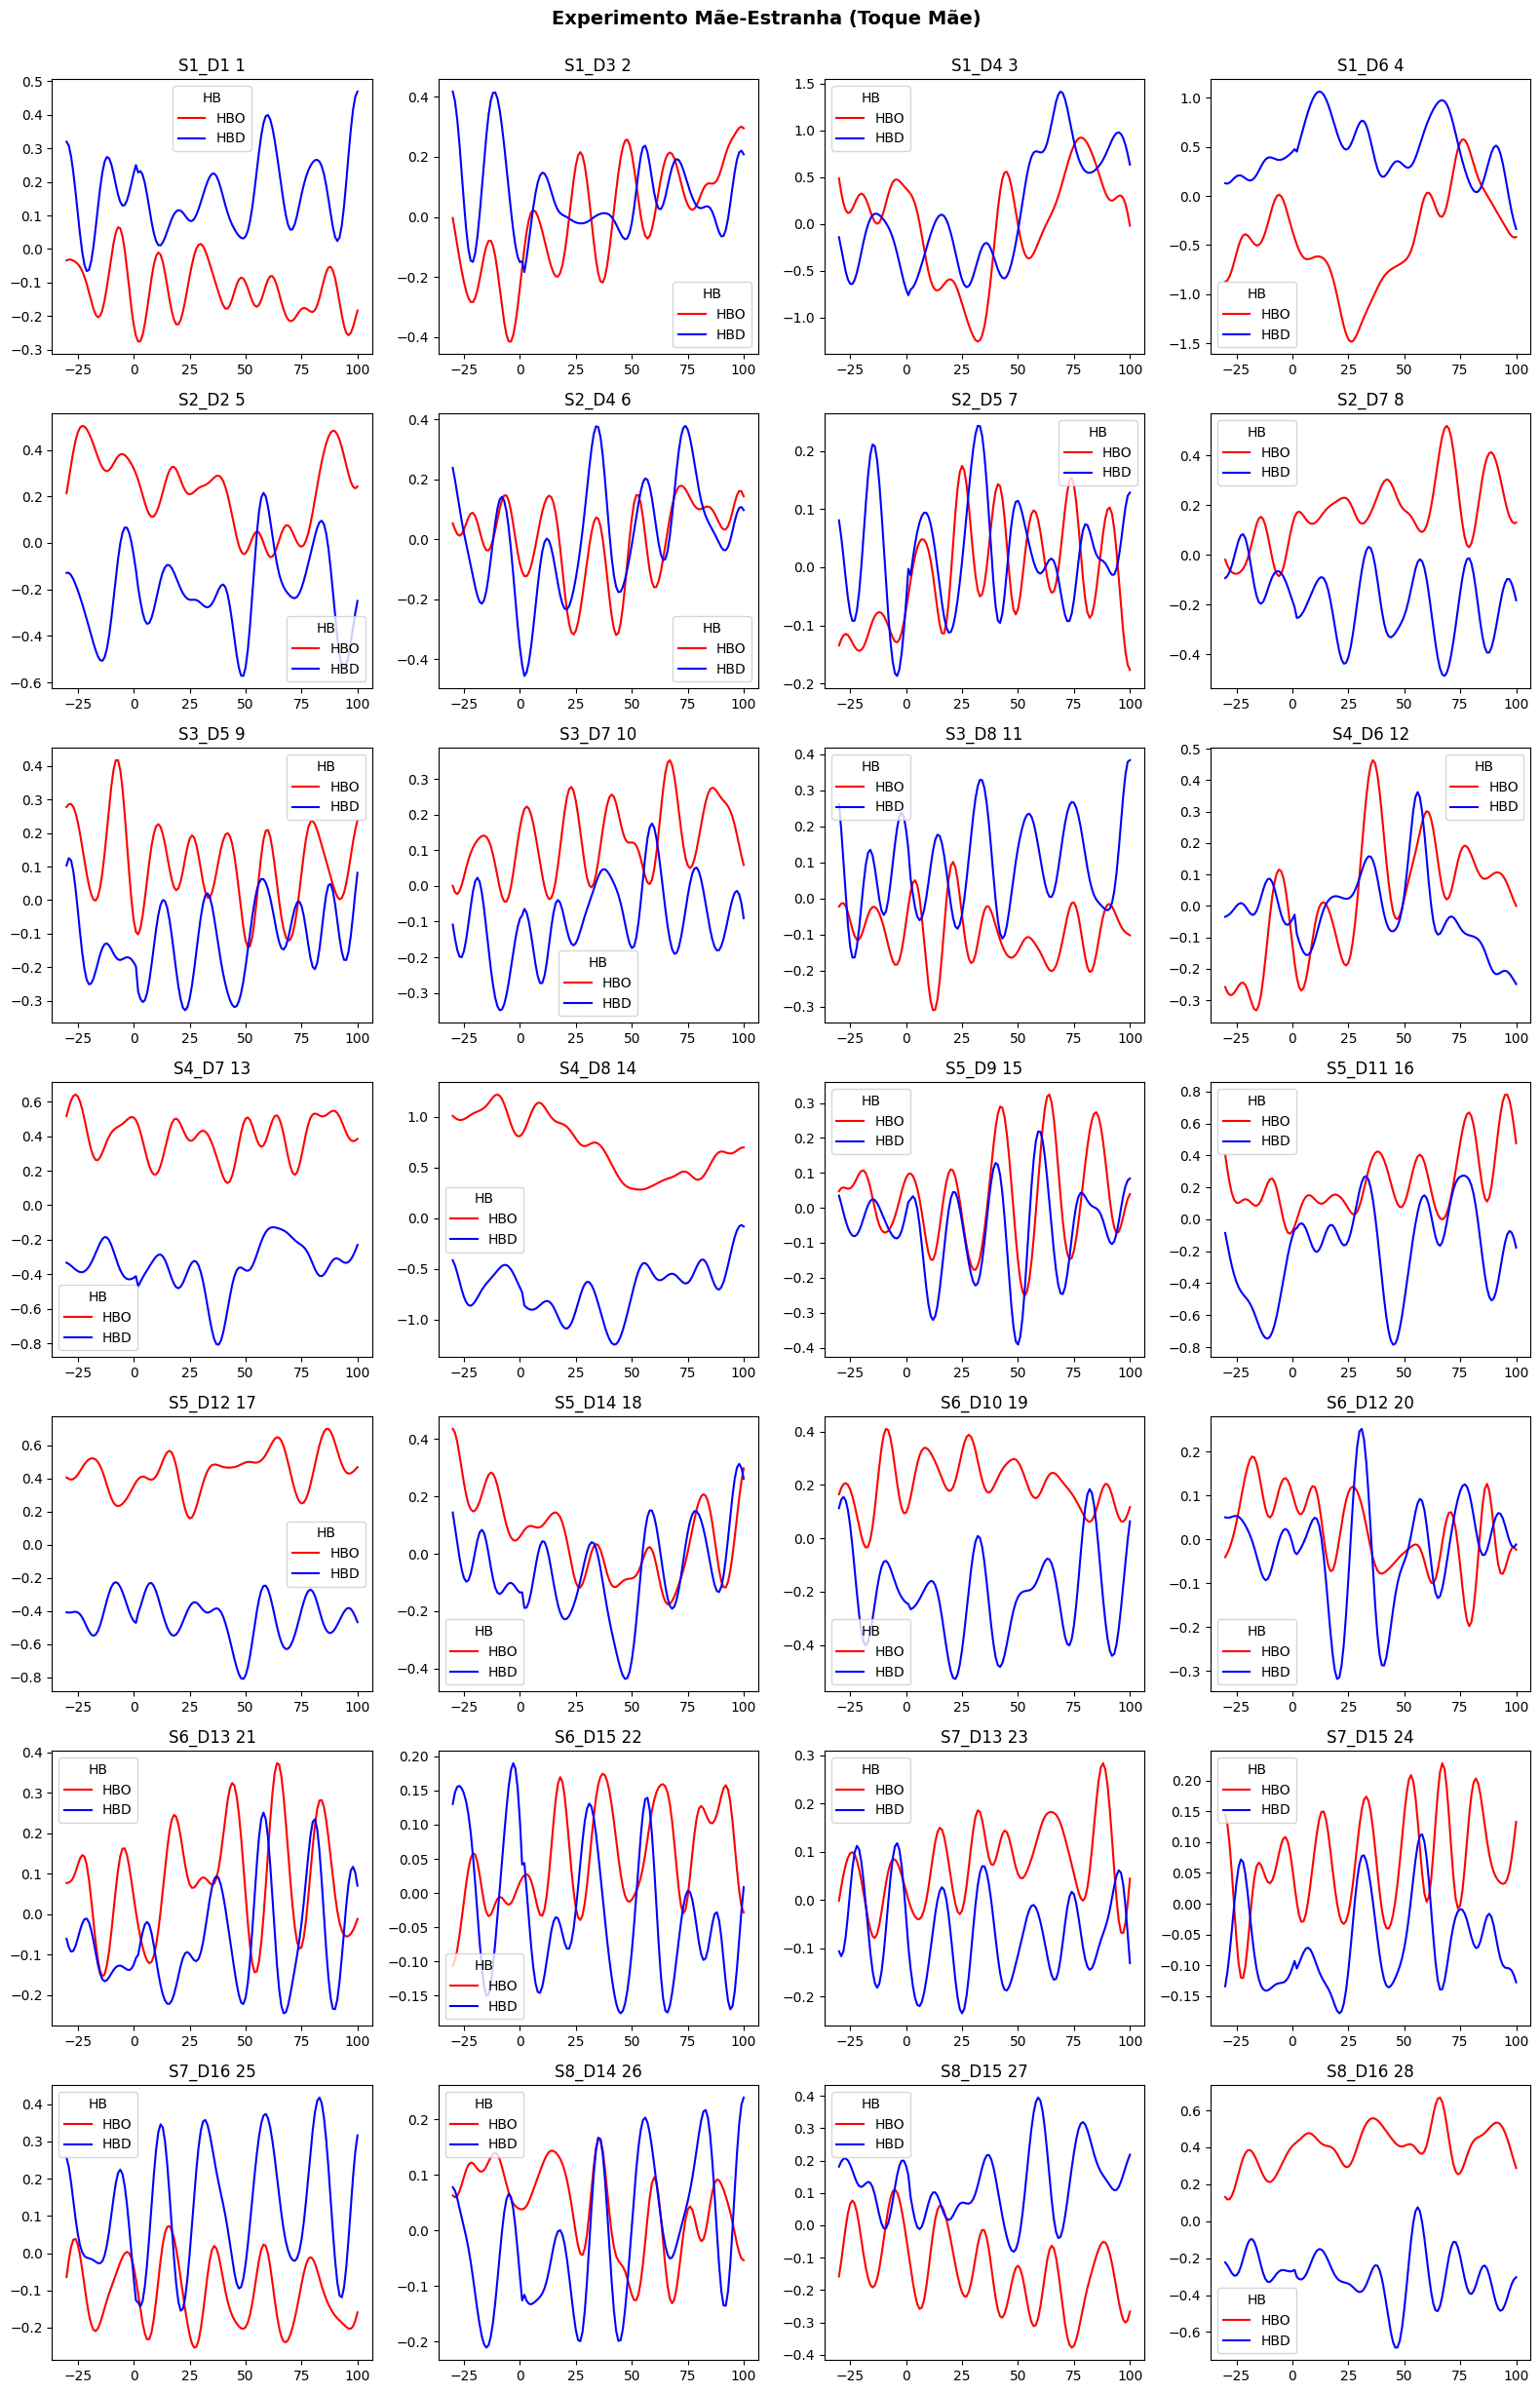

In [12]:
fig, ax = plt.subplots(7,4,figsize=(16,7*3.5))
ax1 = ax.flatten()

for i, col in zip(range(len(df_HBO_HBD.columns[5:-1])),df_HBO_HBD.columns[5:-1]):
  sns.lineplot(x='t',y=df[col],hue='HB',data=df_HBO_HBD,ax=ax1[i],palette={'HBO': 'red', 'HBD': 'blue'},errorbar=None)
  # sns.lineplot(x='t',y=df[col],hue='HB',data=df_HBO_HBD,ax=ax1[i],palette={'HBO': 'red', 'HBD': 'blue'},errorbar=('ci',98)) # ruim pois há intersecção dos intervalos
  ax1[i].set_title(col)
  ax1[i].set_xlabel('')
  ax1[i].set_ylabel('')

plt.suptitle('Experimento Mãe-Estranha (Toque Mãe)',fontsize=14, weight='bold',y=1)
plt.tight_layout()
plt.show()

In [13]:
fig.savefig('HB_toque_mae.png')

# Canais significativamente ativos (teste de hipótese)

Verifica os canais que são **ativados**, isto é, aqueles que satisfazem simultaneamente

$$HBO > baseline (=0), e$$
$$HBD < baseline (=0)$$

de modo significativo ( `pvalue` $< 0.05$ ).



In [14]:
from scipy.stats import ttest_1samp

def gera_df_stats(df_HBO_HBD):

  Channel = []
  Ch_nr = []
  HBO_mean = []
  HBO_t = []
  HBO_p = []
  HBO = []
  HBD_mean = []
  HBD_t = []
  HBD_p = []
  HBD = []

  for col in df_HBO_HBD.columns[5:-1]:
    Channel.append(col.split(' ')[0])
    Ch_nr.append(col.split(' ')[1])

    HBO_mean.append(df_HBO_HBD[df_HBO_HBD.HB == 'HBO'][col].mean())

    t_statistic, p_value = ttest_1samp(df_HBO_HBD[df_HBO_HBD.HB == 'HBO'][col], 0, alternative='greater')
    HBO_t.append(t_statistic)
    HBO_p.append(p_value)
    if p_value < 0.005: HBO.append('***')
    elif p_value < 0.001: HBO.append('**')
    elif p_value < 0.05: HBO.append('*')
    else: HBO.append(' ')

    HBD_mean.append(df_HBO_HBD[df_HBO_HBD.HB == 'HBD'][col].mean())

    t_statistic, p_value = ttest_1samp(df_HBO_HBD[df_HBO_HBD.HB == 'HBD'][col], 0, alternative='less')
    HBD_t.append(t_statistic)
    HBD_p.append(p_value)
    if p_value < 0.005: HBD.append('***')
    elif p_value < 0.001: HBD.append('**')
    elif p_value < 0.05: HBD.append('*')
    else: HBD.append(' ')

  df_stats = pd.DataFrame()
  for col in ['Channel', 'Ch_nr', 'HBO_mean', 'HBO_t', 'HBO_p', 'HBO', 'HBD_mean', 'HBD_t', 'HBD_p', 'HBD']:
    df_stats[col] = eval(col)
    # print(len(eval(col)))

  df_stats['Actived'] = (df_stats.HBO_p < 0.05) & (df_stats.HBD_p < 0.05)

  pd.set_option('display.float_format', lambda x: '%.4f' % x)
  df_stats

  return df_stats



In [15]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [16]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Mãe') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

# display(df_HBO_HBD.head())
df_stats_M = gera_df_stats(df_HBO_HBD)
latex_table = gera_df_stats_latex(df_stats_M, 'Tabela: Toque Mãe')
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_M[df_stats_M.Actived == True], 'Tabela: Toque Mãe (somente canais ativados)')
print()
display(Latex(latex_table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Estranha') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

# display(df_HBO_HBD.head())
df_stats_E = gera_df_stats(df_HBO_HBD)
latex_table = gera_df_stats_latex(df_stats_E, 'Tabela: Toque Estranha')
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_E[df_stats_E.Actived == True], 'Tabela: Toque Estranha (somente canais ativados)')
print()
display(Latex(latex_table))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Canais ativos para ambas as situações de toque, 'Mãe' e 'Estranha'

In [18]:
intersection = set(df_stats_M[ df_stats_M.Actived == True ].Channel).intersection(set(df_stats_E[ df_stats_E.Actived == True ].Channel))
print(intersection)


{'S3_D5', 'S6_D10', 'S7_D15'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
latex_table = gera_df_stats_latex(df_stats_M[df_stats_M.Channel.isin(intersection)], 'Tabela: Toque Mãe (somente canais ativados em ambos, para Mãe e Estranha)')
print()
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_E[df_stats_E.Channel.isin(intersection)], 'Tabela: Toque Estranha (somente canais ativados em ambos, para Mãe e Estranha)')
print()
display(Latex(latex_table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Modelo GLM Simples

$$ y_t \longleftarrow GLM(\text{HB canais}_t) $$

onde,

$y_t$ corresponde a presença de estímulo ou não ao longo do tempo (estímulo pode ser o toque da Mãe ou da Estranha)

$\text{HBO canais}_t$ corresponde a HB (HBO ou HBD) de cada canal ao longo do tempo.

In [21]:
df_M_B_HB = df[ ((df.ss == 'Mãe') | (df.ss == '0')) ].reset_index(drop=True)
df_E_B_HB = df[ ((df.ss == 'Estranha') | (df.ss == '0')) ].reset_index(drop=True)

df_M_B_HB['y'] = df.ss == 'Mãe'
df_M_B_HB['y'] = df_M_B_HB['y'].astype('float')
df_E_B_HB['y'] = df.ss == 'Estranha'
df_E_B_HB['y'] = df_E_B_HB['y'].astype('float')

import statsmodels.api as sm

y = df_M_B_HB[df_M_B_HB.HB == 'HBO']['y']
X = df_M_B_HB[df_M_B_HB.HB == 'HBO'][df_M_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Gaussian())
result_M = model.fit()
print('\n\n GLM - Contato Mãe \n\n')
print(result_M.summary())

y = df_E_B_HB[df_E_B_HB.HB == 'HBO']['y']
X = df_E_B_HB[df_E_B_HB.HB == 'HBO'][df_E_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Gaussian())
result_E = model.fit()
print('\n\n GLM - Contato Mãe \n\n')
print(result_E.summary())



 GLM - Contato Mãe 


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 9956
Model:                            GLM   Df Residuals:                     9927
Model Family:                Gaussian   Df Model:                           28
Link Function:               Identity   Scale:                        0.068302
Method:                          IRLS   Log-Likelihood:                -752.40
Date:                Tue, 02 Jan 2024   Deviance:                       678.03
Time:                        20:41:43   Pearson chi2:                     678.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1496
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0895      0

In [22]:
good_M = set(result_M.pvalues[ result_M.pvalues < 0.05 ].index).intersection(result_M.params[ result_M.params > 0 ].index)
good_E = set(result_E.pvalues[ result_E.pvalues < 0.05 ].index).intersection(result_E.params[ result_E.params > 0 ].index)

print('Lista de canais com p < 0.05 para GLM HBO Toque Mãe', list(good_M) )
print('Lista de canais com p < 0.05 para GLM HBO Toque Estranha', list(good_E) )

Lista de canais com p < 0.05 para GLM HBO Toque Mãe ['S4_D6 12', 'S7_D15 24', 'S2_D7 8', 'S8_D16 28', 'S2_D5 7', 'S5_D12 17', 'const', 'S6_D10 19', 'S1_D4 3', 'S3_D5 9']
Lista de canais com p < 0.05 para GLM HBO Toque Estranha ['S8_D15 27', 'S4_D6 12', 'S3_D7 10', 'S5_D14 18', 'S1_D1 1', 'S8_D16 28', 'S1_D3 2', 'S6_D13 21', 'S2_D5 7', 'const', 'S3_D8 11', 'S8_D14 26']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_result_M = result_M.summary().tables[1]
df_result_E = result_E.summary().tables[1]

df_result_M = pd.DataFrame(df_result_M.data[1::],columns=df_result_M.data[0])
df_result_E = pd.DataFrame(df_result_E.data[1::],columns=df_result_E.data[0])
df_result_M = df_result_M[['', 'coef', 'z', 'P>|z|']]
df_result_E = df_result_E[['', 'coef', 'z', 'P>|z|']]

df_result_M[['Channel','Ch_nr']] = df_result_M[''].str.split(pat=' ', n=1, expand=True)
df_result_E[['Channel','Ch_nr']] = df_result_E[''].str.split(pat=' ', n=1, expand=True)
df_result_M.drop(columns='',inplace=True)
df_result_E.drop(columns='',inplace=True)
df_result_M = df_result_M[['Channel', 'Ch_nr', 'coef', 'z', 'P>|z|']]
df_result_E = df_result_E[['Channel', 'Ch_nr', 'coef', 'z', 'P>|z|']]

df_result_M['P>|z|'] = df_result_M['P>|z|'].astype('float')
df_result_E['P>|z|'] = df_result_E['P>|z|'].astype('float')

glm_latex = gera_df_stats_latex(df_result_M[ df_result_M['P>|z|'] < 0.05 ],'GLM HBO - Toque Mãe - Somente Canais Significativos')
display(Latex(glm_latex))
print()

glm_latex = gera_df_stats_latex(df_result_E[ df_result_E['P>|z|'] < 0.05 ],'GLM HBO - Toque Estranha - Somente Canais Significativos')
display(Latex(glm_latex))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Linear Mixed Effects Model HBO - Toque Mãe

Considerando o agrupamento de cada sujeito.

In [30]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,const,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,S2_D4 6,S2_D5 7,S2_D7 8,S3_D5 9,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,1.0000,-0.1324,-3.9089,-35.5002,-10.2626,-0.9359,0.3728,0.2177,1.1990,-0.6939,...,-0.2842,0.6946,-0.4301,0.6991,-1.1568,-0.3473,-1.1617,-0.5115,0.0310,1.6251
1,1.0000,-0.1355,-3.9867,-34.8716,-10.4777,-0.9697,0.4926,0.2429,1.2316,-0.6405,...,-0.2762,0.7382,-0.4224,0.7241,-1.1542,-0.3466,-1.1308,-0.4813,0.0557,1.4874
2,1.0000,-0.1303,-4.0857,-34.1407,-10.6204,-1.0000,0.6161,0.2662,1.2669,-0.5831,...,-0.2672,0.7897,-0.4160,0.7471,-1.1501,-0.3480,-1.0962,-0.4456,0.0834,1.3145
3,1.0000,-0.1164,-4.2013,-33.3388,-10.6627,-1.0262,0.7408,0.2871,1.3033,-0.5235,...,-0.2581,0.8471,-0.4123,0.7674,-1.1456,-0.3510,-1.0593,-0.4059,0.1129,1.1156
4,1.0000,-0.0938,-4.3268,-32.5050,-10.5840,-1.0469,0.8634,0.3053,1.3391,-0.4636,...,-0.2501,0.9076,-0.4127,0.7842,-1.1415,-0.3551,-1.0218,-0.3642,0.1425,0.9027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28553,1.0000,0.1288,4.2417,1.0706,-0.3623,-0.0945,-0.0456,0.1111,0.3928,0.9105,...,0.2752,-0.3312,-0.3317,2.3439,-0.8097,-0.5649,0.9123,-1.9833,2.1516,2.1878
28554,1.0000,0.1524,4.2240,1.0793,-0.3589,-0.1071,-0.0753,0.1055,0.3688,0.8854,...,0.2942,-0.3105,-0.4145,2.3145,-0.8748,-0.5625,0.9038,-1.9351,2.1300,2.1600
28555,1.0000,0.1746,4.2049,1.0840,-0.3567,-0.1183,-0.1006,0.0950,0.3439,0.8536,...,0.3146,-0.2854,-0.4856,2.2908,-0.9367,-0.5607,0.8974,-1.8723,2.1119,2.1365
28556,1.0000,0.1953,4.1820,1.0839,-0.3565,-0.1287,-0.1216,0.0793,0.3181,0.8144,...,0.3341,-0.2582,-0.5444,2.2710,-0.9958,-0.5605,0.8926,-1.7932,2.0965,2.1156


In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y = df_M_B_HB[df_M_B_HB.HB == 'HBO']['y']
X = df_M_B_HB[df_M_B_HB.HB == 'HBO'][df_M_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)

model = sm.MixedLM(y,X, groups=df_M_B_HB[df_M_B_HB.HB == 'HBO']["subj"])

result_M = model.fit()

print(result_M.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y       
No. Observations: 9956    Method:             REML    
No. Groups:       16      Scale:              0.0491  
Min. group size:  393     Log-Likelihood:     662.9360
Max. group size:  917     Converged:          Yes     
Mean group size:  622.2                               
------------------------------------------------------
           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------
const       0.089    0.036   2.471 0.013  0.018  0.160
S1_D1 1    -0.012    0.001 -17.983 0.000 -0.013 -0.011
S1_D3 2    -0.003    0.000  -9.126 0.000 -0.004 -0.002
S1_D4 3     0.009    0.000  21.643 0.000  0.009  0.010
S1_D6 4    -0.001    0.000  -1.569 0.117 -0.001  0.000
S2_D2 5    -0.029    0.002 -16.030 0.000 -0.033 -0.026
S2_D4 6     0.004    0.001   2.846 0.004  0.001  0.007
S2_D5 7    -0.001    0.001  -0.842 0.400 -0.002  0.001
S2_D7 8     0.002  

In [34]:
df_result_M = result_M.summary().tables[1]
df_result_M = df_result_M.reset_index()

df_result_M = df_result_M[['index', 'Coef.', 'z', 'P>|z|']]

df_result_M[['Channel','Ch_nr']] = df_result_M['index'].str.split(pat=' ', n=1, expand=True)
df_result_M.drop(columns='index',inplace=True)
df_result_M = df_result_M[['Channel', 'Ch_nr', 'Coef.', 'z', 'P>|z|']]
df_result_M = df_result_M.iloc[1:-1]

df_result_M['P>|z|'] = df_result_M['P>|z|'].astype('float')

glm_latex = gera_df_stats_latex(df_result_M[ df_result_M['P>|z|'] < 0.05 ],'Linear Mixed Effects Model HBO - Toque Mãe (pvalue < 0.05)')
display(Latex(glm_latex))


<IPython.core.display.Latex object>